# Local optimization using python

In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [11]:

def f(x):
    return x**2 + np.exp(-7 * x**2)


x = np.linspace(0, 2)
y = f(x)


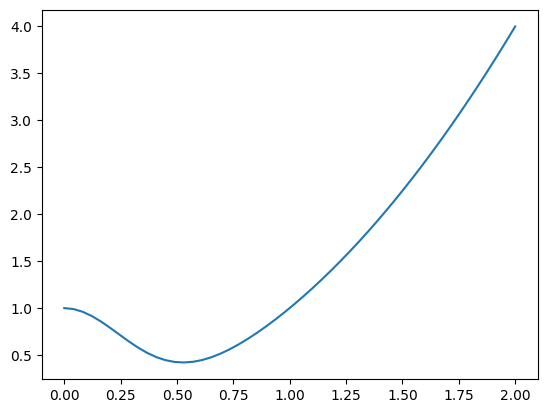

In [12]:
plt.plot(x, y)

Can  we visually guess??

**Pros/cons of finding minima/maxima by inspection!**

*Pros:*

It is easy.

You see the whole domain you are looking at, and it is easy to see how many extrema their are

*Cons:*

Lot’s of function evaluations. Imagine if it took a long time to compute each value.

Somewhat tedious.

Not so easy to reproduce

Not scalable to large problems, your time to do this becomes a limiting factor.[link text](https://)

Lets use bit of math...

In [13]:
x = np.linspace(0, 2, 50)
y = f(x)
i = np.argmin(y)
x[i]

0.5306122448979591

Lets go bit more math

find derivative, solve for zero ....

In [ ]:
def yp(x):
    return 2 * x + np.exp(-7 * x**2) * (-14 * x)




In [15]:
from scipy.optimize import fsolve

fsolve(yp, 0.5)

array([0.52724488])

We gave the starting estimate to make it faster...
Explore different starting estimate and see the compuation time effects ...

**Pros/cons of finding minima/maxima by root finding of the derivatives!**

*Pros:*

We’ve turned a new problem into a different numerical problem that might be easier to solve

*Cons:*

You have to do a derivative by hand or use a numerical estimate.

You get minima, maxima, and saddle points.

Lets use python-Scipy

In [17]:
from scipy.optimize import minimize


def f(x):
    return x**2 + np.exp(-7 * x**2)


guess = 0.5
sol = minimize(f, guess)
sol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.4208443070079023
        x: [ 5.272e-01]
      nit: 3
      jac: [-2.235e-08]
 hess_inv: [[ 1.284e-01]]
     nfev: 10
     njev: 5

Lets now try to plot out minimum ..

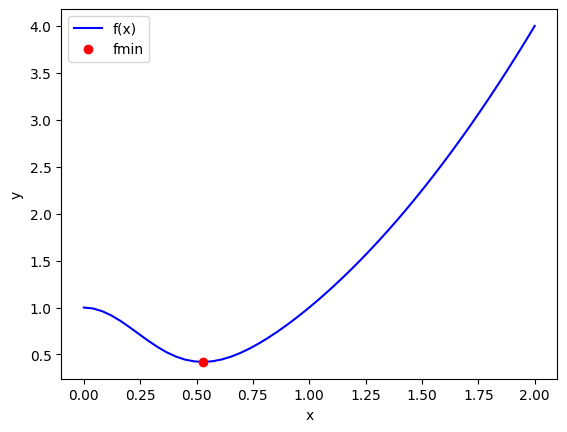

In [18]:
x = np.linspace(0, 2)
y = f(x)

plt.plot(x, y, "b-")
plt.plot(sol.x, f(sol.x), "ro")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["f(x)", "fmin"])

A note on tolerance:

Remember that these iterative approaches stop when a tolerance is met. Check the defaults on fmin!

In [19]:
from scipy.optimize import minimize


def f(x):
    return x**2 + np.exp(-7 * x**2)


guess = 0.5
sol = minimize(f, guess, tol = 0.0000001)
sol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.4208443070079023
        x: [ 5.272e-01]
      nit: 3
      jac: [-2.235e-08]
 hess_inv: [[ 1.284e-01]]
     nfev: 10
     njev: 5

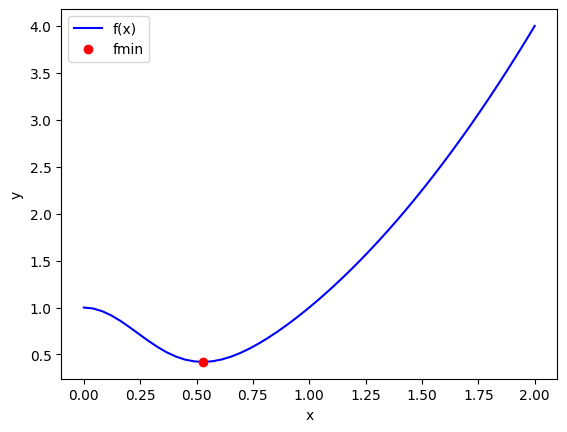

In [20]:
x = np.linspace(0, 2)
y = f(x)

plt.plot(x, y, "b-")
plt.plot(sol.x, f(sol.x), "ro")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["f(x)", "fmin"])

Multiple minima

Text(0, 0.5, 'h(x)')

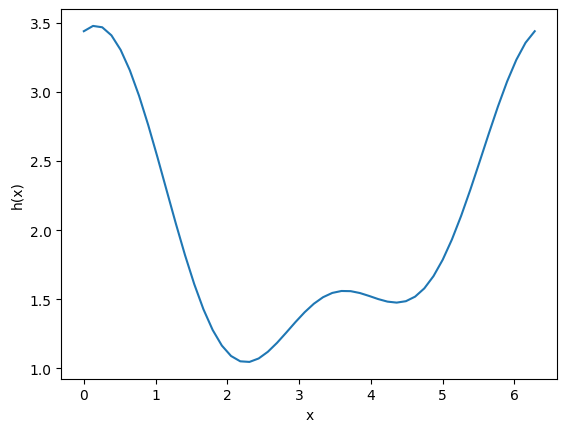

In [21]:
def h(x):
    return 2 + np.cos(x) + np.cos(2 * x - 0.5) / 2


x = np.linspace(0, 2 * np.pi)

plt.plot(x, h(x))
plt.xlabel("x")
plt.ylabel("h(x)")

In [22]:
minimize(h, 2)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.0448871783746692
        x: [ 2.261e+00]
      nit: 3
      jac: [-1.490e-08]
 hess_inv: [[ 5.234e-01]]
     nfev: 10
     njev: 5

In [23]:
minimize(h, 4)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.4758979742813436
        x: [ 4.355e+00]
      nit: 5
      jac: [-9.090e-07]
 hess_inv: [[ 9.473e-01]]
     nfev: 14
     njev: 7

You have to decide which one is better for the problem at hand. If this were a cost function, the one at the lower cost is probably better! Note that all we can say here is which one is lower in the interval we are looking at. By inspection of the function, you can see it will be periodic, so there will be many other minima that also exist.

**Finding Maxima using minimise function **

We can use it to find maxima though, by finding the minima of (negative function = -f(x))

Text(0, 0.5, '-h(x)')

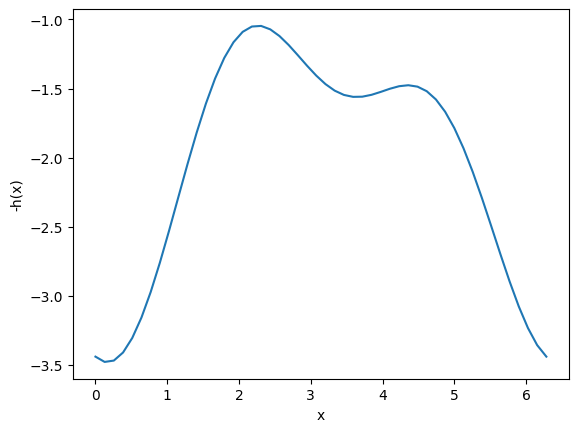

In [24]:
plt.plot(x, -h(x))
plt.xlabel("x")
plt.ylabel("-h(x)")

[1.56120872]


Text(0, 0.5, 'h(x)')

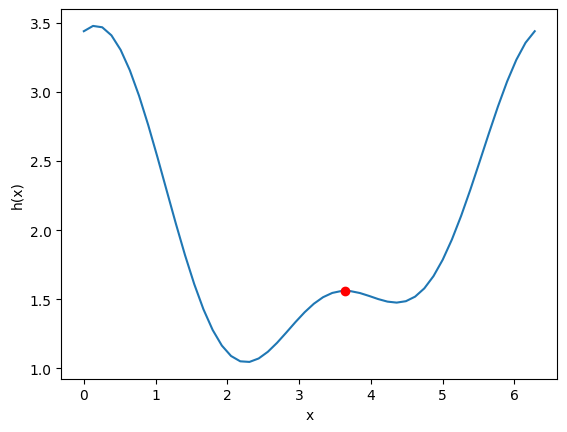

In [25]:
def h(x, sign=1):
    return sign * (2 + np.cos(x) + np.cos(2 * x - 0.5) / 2)


sol = minimize(h, 3.5, args=(-1,))  # set sign=-1 here to minimize -h(x)
print(h(sol.x))  # sign defaults to 1 here, so we get the maximum value

plt.plot(x, h(x))
plt.plot(sol.x, h(sol.x), "ro")
plt.xlabel("x")
plt.ylabel("h(x)")

Fun extension .....
Animating the search
(source
https://ulissigroup.cheme.cmu.edu/F22-06-325/notes/review_optimization.html)

In [26]:
def wrap_function_save_eval(x, function, function_eval_save):
    y = function(x)
    function_eval_save.append((x, y))
    return y


# List to contain all of the function evaluations
function_eval_save = []
x0 = 1

sol = minimize(wrap_function_save_eval, x0, args=(h, function_eval_save))

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib import animation, rc

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.close()

# Add the analytical solution
x = np.linspace(0, 2 * np.pi)
ax.plot(x, h(x))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim([-1, 7])
ax.set_ylim([0, 4])

# Make a blank line and quiver to hold the data points as they get evaluated
(line,) = ax.plot([], [], "or", label="Function evaluations")
(linefinal,) = ax.plot([], [], "ok", label="Latest function evaluation")

ax.legend()

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    linefinal.set_data([], [])

    return (line, linefinal)


# animation function. This is called sequentially
def animate(i):
    # unzip the t, y, and yp vectors as separate vectors
    x, y = zip(*function_eval_save)

    # Set the data for the line
    line.set_data(x[:i], y[:i])
    linefinal.set_data(x[i - 1], y[i - 1])

    return (line, linefinal)


# Make the animation!
anim = animation.FuncAnimation(
    fig,
    animate,
    init_func=init,
    frames=len(function_eval_save) + 1,
    interval=1000,
    repeat_delay=5000,
    blit=True,
)

# Note: below is the part which helps it work on jupyterbook
rc("animation", html="jshtml")
anim